# AI Training Session 5: Machine Learning Fundamentals

Welcome to the hands-on notebook for Session 5! This notebook covers key machine learning concepts from the presentation, including data splitting, errors, bias and variance, overfitting and underfitting, regularized linear regression, logistic regression, evaluation metrics, and decision trees. You'll run code examples, complete exercises, and research topics to deepen your understanding.

**Instructions**:
- Run each code cell to see the output.
- Complete the exercises by writing code or explanations in the provided cells.
- Use Google or X to search for additional resources (e.g., 'Scikit-learn logistic regression documentation' or 'bias variance tradeoff explained') and summarize your findings.
- Be prepared to explain your results to the group!

**Required Libraries**: Ensure you have `numpy`, `scikit-learn`, and `matplotlib` installed. Run the following to install them:
```bash
pip install numpy scikit-learn matplotlib
```

In [1]:
# ! pip install numpy scikit-learn matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline

## 1. Training, Validation, and Testing Datasets

**Concept**: In machine learning, we split data into three parts:
- **Training Dataset**: Used to train the model (learn patterns).
- **Validation Dataset**: Used to tune hyperparameters (e.g., model complexity).
- **Testing Dataset**: Used to evaluate the final model's performance on unseen data.

**Example**: We'll use the dataset from the presentation (`x = [3, 4, 6]`, `y = [7, 9, 12]`) to demonstrate splitting and predicting for `x = 5`.

**Code**: Let's create a larger dataset based on the pattern `y ≈ 2x + 1` and split it.

Training data: X = [ 8  6 10  2  1  7], y = [17.38371736 13.32384427 21.27128002  4.88292331  3.76151493 15.78960641]
Validation data: X = [9 5], y = [18.76526281 10.88293152]
Test data: X = [4 3], y = [8.93086785 7.24835708]
Prediction for x = 5: y = 11.40


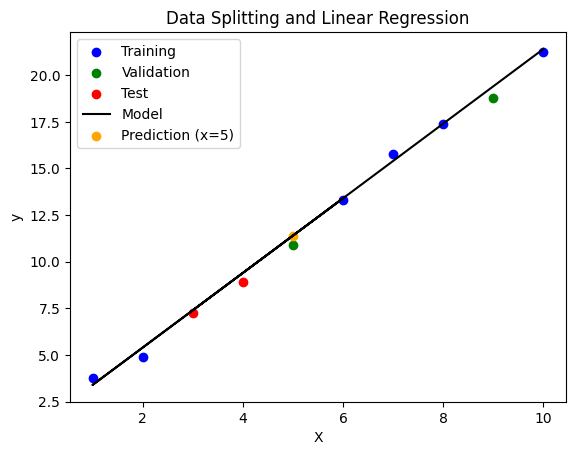

In [3]:
# Generate a dataset
np.random.seed(42)
X = np.array([[3], [4], [6], [1], [2], [5], [7], [8], [9], [10]])
y = 2 * X.flatten() + 1 + np.random.normal(0, 0.5, X.shape[0])  # y ≈ 2x + 1 + noise

# Split into train (60%), validation (20%), test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for x = 5
x_new = np.array([[5]])
y_pred = model.predict(x_new)

print(f'Training data: X = {X_train.flatten()}, y = {y_train}')
print(f'Validation data: X = {X_val.flatten()}, y = {y_val}')
print(f'Test data: X = {X_test.flatten()}, y = {y_test}')
print(f'Prediction for x = 5: y = {y_pred[0]:.2f}')

# Plot
plt.scatter(X_train, y_train, color='blue', label='Training')
plt.scatter(X_val, y_val, color='green', label='Validation')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X, model.predict(X), color='black', label='Model')
plt.scatter([5], y_pred, color='orange', label='Prediction (x=5)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Data Splitting and Linear Regression')
plt.show()

**Exercise 1**:
1. Explain why we split data into training, validation, and test sets.
2. Modify the code to predict `y` for `x = 7`. What is the predicted value?
3. Search online for 'train test split scikit-learn' and summarize one key point from the documentation.

<details>
<summary></summary>

```python
# Predict for x = 7
x_new = np.array([[7]])
y_pred = model.predict(x_new)
print(f'Prediction for x = 7: y = {y_pred[0]:.2f}')

## 2. Error in ML Models

**Concept**: Errors occur when predictions differ from actual values. For regression, we use Mean Squared Error (MSE). For classification, we use accuracy (correct predictions / total predictions).

**Example**: The presentation showed accuracy for classification (e.g., 78%, 94%, 100%). Let's calculate MSE for our regression model.

**Code**: Compute MSE on the test set.

In [4]:
from sklearn.metrics import mean_squared_error

y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error on test set: {mse:.2f}')

Mean Squared Error on test set: 0.12


**Exercise 2**:
1. Calculate MSE for the validation set.
2. What does a high MSE indicate about the model?
3. Search for 'mean squared error in machine learning' and explain one application of MSE.

<details>
<summary></summary>

```python
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on validation set: {mse_val:.2f}')

## 3. Bias and Variance

**Concept**:
- **Bias**: Error due to overly simple models (underfitting).
- **Variance**: Error due to overly complex models (overfitting).
- The goal is to balance bias and variance for optimal performance.

**Example**: We'll fit a linear model (high bias) and a polynomial model (high variance) to the data.

**Code**: Compare linear and polynomial regression.

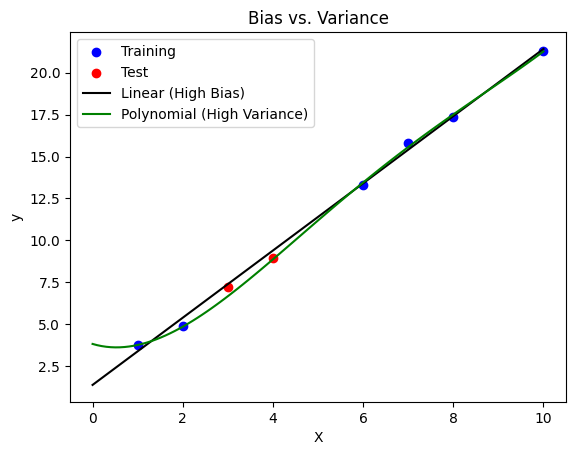

MSE Linear: 0.12, MSE Polynomial: 0.17


In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial regression (degree 4, high variance)
polyreg = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
polyreg.fit(X_train, y_train)

# Plot
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
plt.scatter(X_train, y_train, color='blue', label='Training')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X_plot, model.predict(X_plot), color='black', label='Linear (High Bias)')
plt.plot(X_plot, polyreg.predict(X_plot), color='green', label='Polynomial (High Variance)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Bias vs. Variance')
plt.show()

# MSE for polynomial model
y_test_pred_poly = polyreg.predict(X_test)
mse_poly = mean_squared_error(y_test, y_test_pred_poly)
print(f'MSE Linear: {mse:.2f}, MSE Polynomial: {mse_poly:.2f}')

**Exercise 3**:
1. Which model has higher variance? Why?
2. Try a polynomial of degree 2. Does it balance bias and variance better?
3. Search for 'bias variance tradeoff machine learning' and summarize one article or post.

<details>
<summary></summary>

```python
# Polynomial regression (degree 2)
polyreg_deg2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polyreg_deg2.fit(X_train, y_train)

# MSE for polynomial degree 2
y_test_pred_poly2 = polyreg_deg2.predict(X_test)
mse_poly2 = mean_squared_error(y_test, y_test_pred_poly2)
print(f'MSE Linear: {mse:.2f}, MSE Polynomial (degree 2): {mse_poly2:.2f}, MSE Polynomial (degree 4): {mse_poly:.2f}')

# Plot
plt.scatter(X_train, y_train, color='blue', label='Training')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X_plot, model.predict(X_plot), color='black', label='Linear (High Bias)')
plt.plot(X_plot, polyreg_deg2.predict(X_plot), color='blue', label='Polynomial (Degree 2)')
plt.plot(X_plot, polyreg.predict(X_plot), color='green', label='Polynomial (Degree 4)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Bias vs. Variance (Degree 2 vs. Degree 4)')
plt.show()


## 4. Overfitting and Underfitting

**Concept**:
- **Overfitting**: Model performs well on training data but poorly on test data (high variance).
- **Underfitting**: Model performs poorly on both training and test data (high bias).

**Example**: The linear model underfits; the polynomial (degree 4) overfits. Let's compare training and test errors.

**Code**: Calculate training and test MSE.

In [6]:
y_train_pred = model.predict(X_train)
y_train_pred_poly = polyreg.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
print(f'Linear Model - Training MSE: {mse_train:.2f}, Test MSE: {mse:.2f}')
print(f'Polynomial Model - Training MSE: {mse_train_poly:.2f}, Test MSE: {mse_poly:.2f}')

Linear Model - Training MSE: 0.10, Test MSE: 0.12
Polynomial Model - Training MSE: 0.01, Test MSE: 0.17


**Exercise 4**:
1. Does the linear model show underfitting? Does the polynomial model show overfitting? Explain.
2. Try a polynomial of degree 3 and compare training/test MSE.
3. Search for 'overfitting machine learning' and list one technique to reduce overfitting.


<details>
<summary></summary>

```python
# Polynomial regression (degree 3)
polyreg_deg3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
polyreg_deg3.fit(X_train, y_train)

# Calculate MSE
y_train_pred_deg3 = polyreg_deg3.predict(X_train)
y_test_pred_deg3 = polyreg_deg3.predict(X_test)
mse_train_deg3 = mean_squared_error(y_train, y_train_pred_deg3)
mse_test_deg3 = mean_squared_error(y_test, y_test_pred_deg3)
print(f'Linear Model - Training MSE: {mse_train:.2f}, Test MSE: {mse:.2f}')
print(f'Polynomial (Degree 3) - Training MSE: {mse_train_deg3:.2f}, Test MSE: {mse_test_deg3:.2f}')
print(f'Polynomial (Degree 4) - Training MSE: {mse_train_poly:.2f}, Test MSE: {mse_poly:.2f}')

## 5. Regularized Linear Regression

**Concept**:
- Regularization reduces overfitting by penalizing large coefficients.
- **L1 (Lasso)**: Sets some coefficients to zero (feature selection).
- **L2 (Ridge)**: Shrinks all coefficients toward zero (smoother model).

**Example**: Apply Ridge and Lasso to the polynomial model.

**Code**: Fit Ridge and Lasso models.

c:\Users\Mega Store\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.818e-01, tolerance: 2.463e-02
  model = cd_fast.enet_coordinate_descent(


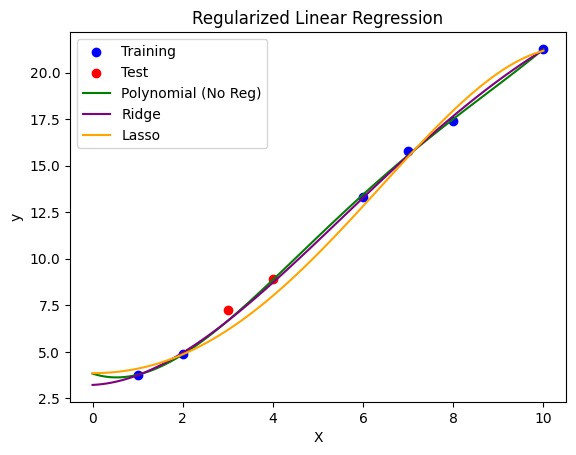

MSE Polynomial: 0.17, MSE Ridge: 0.19, MSE Lasso: 0.99


In [7]:
# Ridge and Lasso with polynomial features
ridge = make_pipeline(PolynomialFeatures(degree=4), Ridge(alpha=1.0))
lasso = make_pipeline(PolynomialFeatures(degree=4), Lasso(alpha=1.0))
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Plot
plt.scatter(X_train, y_train, color='blue', label='Training')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X_plot, polyreg.predict(X_plot), color='green', label='Polynomial (No Reg)')
plt.plot(X_plot, ridge.predict(X_plot), color='purple', label='Ridge')
plt.plot(X_plot, lasso.predict(X_plot), color='orange', label='Lasso')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Regularized Linear Regression')
plt.show()

# MSE
y_test_pred_ridge = ridge.predict(X_test)
y_test_pred_lasso = lasso.predict(X_test)
print(f'MSE Polynomial: {mse_poly:.2f}, MSE Ridge: {mean_squared_error(y_test, y_test_pred_ridge):.2f}, MSE Lasso: {mean_squared_error(y_test, y_test_pred_lasso):.2f}')

**Exercise 5**:
1. How do Ridge and Lasso affect the polynomial model's fit compared to no regularization?
2. Try different `alpha` values (e.g., 0.1, 10) for Ridge. How does the fit change?
3. Search for 'L1 vs L2 regularization' and explain one difference.

<details>
<summary></summary>

```python
# Ridge with different alpha values
ridge_alpha_low = make_pipeline(PolynomialFeatures(degree=4), Ridge(alpha=0.1))
ridge_alpha_high = make_pipeline(PolynomialFeatures(degree=4), Ridge(alpha=10.0))
ridge_alpha_low.fit(X_train, y_train)
ridge_alpha_high.fit(X_train, y_train)

# Plot
plt.scatter(X_train, y_train, color='blue', label='Training')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X_plot, polyreg.predict(X_plot), color='green', label='Polynomial (No Reg)')
plt.plot(X_plot, ridge_alpha_low.predict(X_plot), color='purple', label='Ridge (alpha=0.1)')
plt.plot(X_plot, ridge_alpha_high.predict(X_plot), color='orange', label='Ridge (alpha=10)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Ridge Regularization with Different Alphas')
plt.show()

# MSE
y_test_pred_ridge_low = ridge_alpha_low.predict(X_test)
y_test_pred_ridge_high = ridge_alpha_high.predict(X_test)
print(f'MSE Polynomial: {mse_poly:.2f}')
print(f'MSE Ridge (alpha=0.1): {mean_squared_error(y_test, y_test_pred_ridge_low):.2f}')
print(f'MSE Ridge (alpha=10): {mean_squared_error(y_test, y_test_pred_ridge_high):.2f}')

## 6. Classification Models: Logistic Regression

**Concept**:
- Logistic regression predicts probabilities for categorical outcomes (e.g., 0 or 1) using the sigmoid function.
- Example: Predict whether `y > 10` (1) or not (0) based on `x`.

**Code**: Fit logistic regression to classify `y > 10`.

Probability for x = 5: P(y > 10) = 0.76, P(y ≤ 10) = 0.24


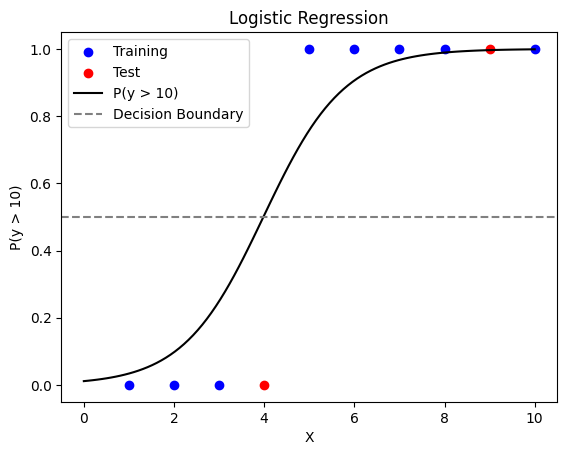

In [8]:
# Create binary labels (y > 10)
y_binary = (y > 10).astype(int)

# Split data
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train_bin)

# Predict probabilities
x_new = np.array([[5]])
prob = logreg.predict_proba(x_new)[0]
print(f'Probability for x = 5: P(y > 10) = {prob[1]:.2f}, P(y ≤ 10) = {prob[0]:.2f}')

# Plot decision boundary
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
probs = logreg.predict_proba(X_plot)[:, 1]
plt.scatter(X_train, y_train_bin, color='blue', label='Training')
plt.scatter(X_test, y_test_bin, color='red', label='Test')
plt.plot(X_plot, probs, color='black', label='P(y > 10)')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Boundary')
plt.xlabel('X')
plt.ylabel('P(y > 10)')
plt.legend()
plt.title('Logistic Regression')
plt.show()

**Exercise 6**:
1. What does the sigmoid function do in logistic regression?
2. Predict the class (0 or 1) for `x = 7`. Is it correct?
3. Search for 'logistic regression sigmoid function' and summarize its mathematical form.

<details>
<summary></summary>

```python
# Predict class for x = 7
x_new = np.array([[7]])
class_pred = logreg.predict(x_new)
print(f'Predicted class for x = 7: {class_pred[0]}')

## 7. Evaluating Classification Models

**Concept**:
- Use confusion matrix, accuracy, precision, recall, and F1 score to evaluate classification models.
- **Confusion Matrix**: Shows True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN).

**Code**: Evaluate the logistic regression model.

In [9]:
y_test_pred_bin = logreg.predict(X_test)
cm = confusion_matrix(y_test_bin, y_test_pred_bin)
accuracy = accuracy_score(y_test_bin, y_test_pred_bin)
precision = precision_score(y_test_bin, y_test_pred_bin)
recall = recall_score(y_test_bin, y_test_pred_bin)
f1 = f1_score(y_test_bin, y_test_pred_bin)

print('Confusion Matrix:\n', cm)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Confusion Matrix:
 [[0 1]
 [0 1]]
Accuracy: 0.50
Precision: 0.50
Recall: 1.00
F1 Score: 0.67


**Exercise 7**:
1. Interpret the confusion matrix. What do TP, TN, FP, FN mean in this context?
2. Why is F1 score useful compared to accuracy?
3. Search for 'confusion matrix machine learning' and explain one real-world application.

## 8. Standard Deviation and Coefficient of Variation

**Concept**:
- **Standard Deviation (σ)**: Measures data spread (square root of variance).
- **Coefficient of Variation (CV)**: Relative spread (σ / mean).

**Code**: Calculate σ and CV for the dataset.

In [10]:
std = np.std(y)
mean = np.mean(y)
cv = std / mean
print(f'Standard Deviation: {std:.2f}')
print(f'Mean: {mean:.2f}')
print(f'Coefficient of Variation: {cv:.2f}')

Standard Deviation: 5.73
Mean: 12.22
Coefficient of Variation: 0.47


<details>
<summary></summary>

```python
std_test = np.std(y_test)
mean_test = np.mean(y_test)
cv_test = std_test / mean_test
print(f'Test Set Standard Deviation: {std_test:.2f}')
print(f'Test Set Mean: {mean_test:.2f}')
print(f'Test Set Coefficient of Variation: {cv_test:.2f}')

**Exercise 8**:
1. What does a high CV indicate about the data?
2. Calculate σ and CV for the test set only.
3. Search for 'coefficient of variation machine learning' and list one use case.

## 9. Decision Tree Regression

**Concept**:
- Decision trees split data into subsets based on features, using Standard Deviation Reduction (SDR) to choose splits.
- Leaf nodes predict the average target value of the subset.

**Code**: Fit a decision tree regressor.

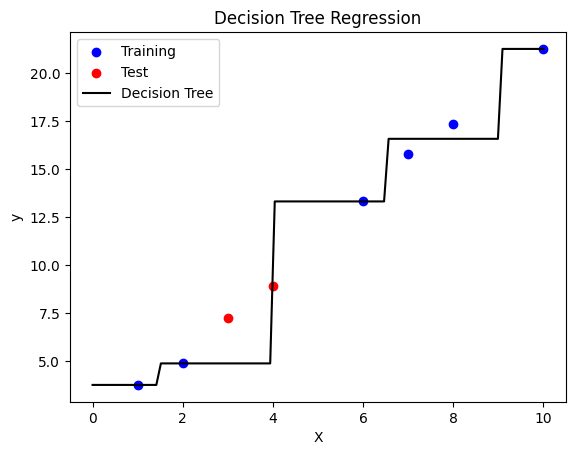

MSE Decision Tree: 10.99


In [12]:
X_train_reg, X_temp_reg, y_train_reg, y_temp_reg = train_test_split(X, y, test_size=0.4, random_state=42)
X_val_reg, X_test_reg, y_val_reg, y_test_reg = train_test_split(X_temp_reg, y_temp_reg, test_size=0.5, random_state=42)

dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X_train_reg, y_train_reg)

# Plot
y_test_pred_dt = dt.predict(X_test_reg)
plt.scatter(X_train_reg, y_train_reg, color='blue', label='Training')
plt.scatter(X_test_reg, y_test_reg, color='red', label='Test')
plt.plot(X_plot, dt.predict(X_plot), color='black', label='Decision Tree')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Decision Tree Regression')
plt.show()

mse_dt = mean_squared_error(y_test_reg, y_test_pred_dt)
print(f'MSE Decision Tree: {mse_dt:.2f}')

<details>
<summary></summary>

```python
X_train_reg, X_temp_reg, y_train_reg, y_temp_reg = train_test_split(X, y, test_size=0.4, random_state=42)
X_val_reg, X_test_reg, y_val_reg, y_test_reg = train_test_split(X_temp_reg, y_temp_reg, test_size=0.5, random_state=42)

dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X_train_reg, y_train_reg)

# Plot
y_test_pred_dt = dt.predict(X_test_reg)
plt.scatter(X_train_reg, y_train_reg, color='blue', label='Training')
plt.scatter(X_test_reg, y_test_reg, color='red', label='Test')
plt.plot(X_plot, dt.predict(X_plot), color='black', label='Decision Tree')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Decision Tree Regression')
plt.show()

mse_dt = mean_squared_error(y_test_reg, y_test_pred_dt)
print(f'MSE Decision Tree: {mse_dt:.2f}')

**Exercise 9**:
1. How does the decision tree split the data? (Hint: Look at the plot.)
2. Try `max_depth=5`. Does it overfit? Compare MSE.
3. Search for 'decision tree regression scikit-learn' and summarize one parameter's effect.

<details>
<summary></summary>

```python
# Decision tree with max_depth=5
dt_depth5 = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_depth5.fit(X_train, y_train)

# Calculate MSE
y_test_pred_dt5 = dt_depth5.predict(X_test)
mse_dt5 = mean_squared_error(y_test, y_test_pred_dt5)
print(f'MSE Decision Tree (max_depth=3): {mse_dt:.2f}')
print(f'MSE Decision Tree (max_depth=5): {mse_dt5:.2f}')

# Plot
plt.scatter(X_train, y_train, color='blue', label='Training')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X_plot, dt.predict(X_plot), color='black', label='Decision Tree (max_depth=3)')
plt.plot(X_plot, dt_depth5.predict(X_plot), color='green', label='Decision Tree (max_depth=5)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Decision Tree Regression (max_depth=3 vs. 5)')
plt.show()

## 10. Final Task: Research and Explain

**Task**: Choose one topic (e.g., Bias and Variance, Logistic Regression, Decision Trees) and:
1. Search for an article or post on Google or X (e.g., 'bias variance tradeoff explained').
2. Summarize the key points in 3-5 sentences.
3. Present your findings to the group, explaining how it relates to the code above.